In [1]:
"""
Searching for a target with a kernel.
Create a kernel by cropping an image.
Use normalised cross correlation to search image for good matches.
"""

import numpy as np
from scipy import misc,ndimage
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.transform import downscale_local_mean


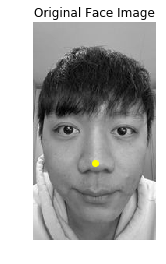

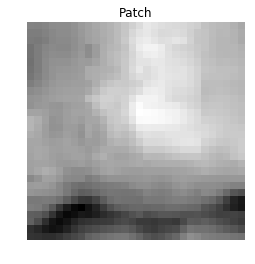

In [2]:
# Load image as grey-scale and convert to type float
face_im_full = color.rgb2gray(io.imread('swh_face1.jpg')).astype(np.float32)

# Downscale image for speed
face_im=downscale_local_mean(face_im_full,(1,1))


# Target centre 
#p=[162, 75] # Right eye
p=[79, 180] # Nose tip
#p=[162, 162] # Right mouth corner


plt.imshow(face_im, cmap=plt.cm.gray)
plt.plot(p[0],p[1],"o",color="yellow")
plt.axis('off')   # Don't display image axes
plt.title("Original Face Image")
plt.show()

# Half-width of region to crop
w=15

# Crop patch.
# Note use (y,x) because image represented as matrix
patch=face_im[p[1]-w:p[1]+w,p[0]-w:p[0]+w]

# io.imsave("kernel_patch.png",patch)

# Remove mean value
patch=patch-patch.mean()

# Arrange that sum of squares of elements is unity
patch=patch/(np.sqrt((patch*patch).sum()))

plt.imshow(patch,cmap=plt.cm.gray)
plt.axis('off')   # Don't display image axes
plt.title("Patch")
plt.show()


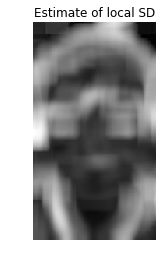

Range of NCC result: [ -0.7770561 , 0.89893746 ]


In [3]:
# Load image as grey-scale and convert to type float
face_im2_full = color.rgb2gray(io.imread('swh_face2.jpg')).astype(np.float32)

# Downscale image for speed
face_im2=downscale_local_mean(face_im2_full,(1,1))

# io.imsave("face2.png",face_im2)


result1=ndimage.correlate(face_im2,patch)


# Compute local estimate of variance using
# var=mean_sqr-mean*mean
mean_im=ndimage.filters.uniform_filter(face_im2,patch.shape)
sum_sq_im=ndimage.filters.uniform_filter(face_im2*face_im2,patch.shape)
var_im=sum_sq_im-(mean_im*mean_im)
ssd_im=var_im*patch.size  # Sum of Sq. Diff = n * var
sd_im=np.sqrt(ssd_im)

plt.imshow(sd_im,cmap=plt.cm.gray)
plt.axis('off')   # Don't display image axes
plt.title("Estimate of local SD")
plt.show()


ncc_result=result1/(sd_im+0.0001)

print("Range of NCC result: [",ncc_result.min(),",",ncc_result.max(),"]")

Max response at  (173, 76)


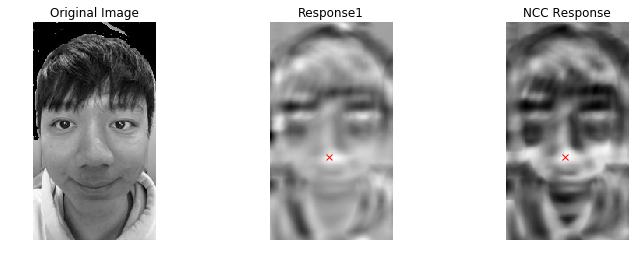

In [4]:
# io.imsave("ncc_result.png",ncc_result)

# Find the position of the peak (maximum)
# np.argmax() returns index as single integer
# np.unravel_index converts that into the (i,j) position
max_p=np.unravel_index(np.argmax(ncc_result, axis=None), ncc_result.shape)
print("Max response at ",max_p)

# Uncomment the following line to threshold the result
#ncc_result=(ncc_result>0.5)*ncc_result

fig2 = plt.figure(figsize = (12,4)) # Create a large figure
ax = fig2.add_subplot(1,3,1)
ax.imshow(face_im2, cmap=plt.cm.gray)
ax.set_title("Original Image")
ax.axis('off')
ax = fig2.add_subplot(1,3,2)
ax.imshow(result1, cmap=plt.cm.gray)
ax.set_title("Response1")
ax.plot(max_p[1],max_p[0],"x",color="red")
ax.axis('off')
ax = fig2.add_subplot(1,3,3)
ax.imshow(ncc_result, cmap=plt.cm.gray)
ax.set_title("NCC Response")
ax.plot(max_p[1],max_p[0],"x",color="red")
ax.axis('off')
plt.show()